In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_theme(style="whitegrid")# this is define the theme of the graphs


this is all the import methodsni need for this project

In [11]:
external_data_frame = pd.read_csv('laptop_price - dataset.csv')
external_data_frame.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


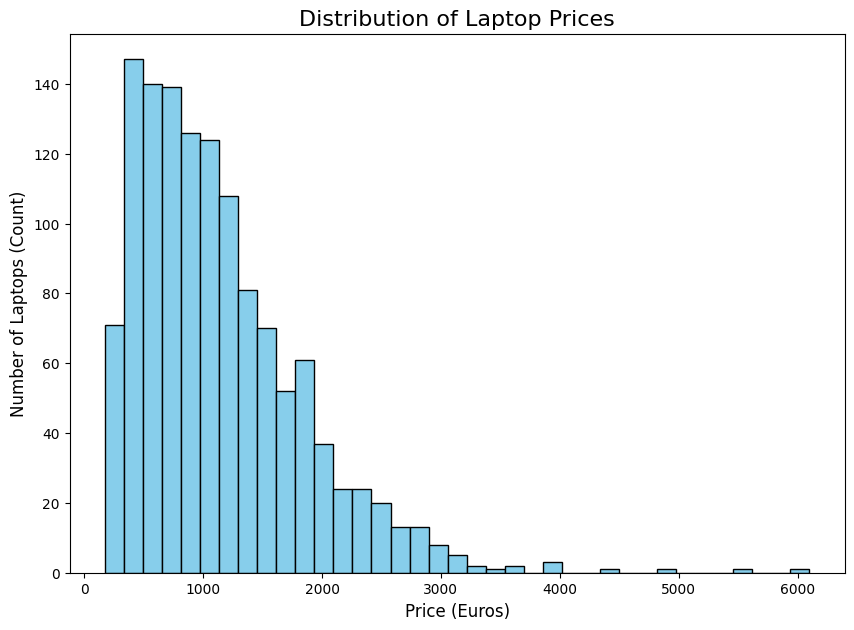

In [12]:
plt.figure(figsize=(10,7))
plt.hist(external_data_frame['Price (Euro)'], bins=37, color='skyblue', edgecolor='black')
plt.title('Distribution of Laptop Prices', fontsize=16)
plt.xlabel('Price (Euros)', fontsize=12)
plt.ylabel('Number of Laptops (Count)', fontsize=12)
plt.show()

here I built the graph firstly I have determined the size of the graph. after that I took the name of each colom that I wanted to compare. lastly I tell him the names of the axises and the name of the entire graph.

In [13]:
company_prices_dict = external_data_frame.groupby('Company')['Price (Euro)'].apply(list).to_dict()
print("Prices for Apple:")
print(company_prices_dict['Apple'])
company_avg_price = {}
for company, price in sorted(company_prices_dict.items()):
    avrage = 0
    for i in range(len(price)):
        if (i + 1) < len(price):
            avrage += price[i]
        else:
            avrage = avrage/(i + 1)
    company_avg_price[company] = avrage #new dict that including dust the average price as a index and the name of the company as a key
save_name = "" # saving the name and the amout to compare
save_max = 0
for company_name , max_avg in company_avg_price.items(): #finding the max index and saving the name
    if save_max < max_avg:
        save_max = max_avg
        save_name = company_name
    else:
        continue
print("the most expensive company is: ", save_name)
print(company_avg_price)

Prices for Apple:
[1339.69, 898.94, 2537.45, 1803.6, 2139.97, 1158.7, 2439.97, 1262.4, 1518.55, 2858.0, 1099.0, 998.0, 1419.0, 1510.0, 2040.0, 1958.9, 1165.0, 1300.0, 1163.0, 1279.0, 959.0]
the most expensive company is:  Razer
{'Acer': 630.6030693069307, 'Apple': 1518.5319047619046, 'Asus': 1121.4021052631576, 'Chuwi': 231.33, 'Dell': 1196.455395189003, 'Fujitsu': 512.6666666666666, 'Google': 1158.0, 'HP': 1077.4639179104474, 'Huawei': 674.5, 'LG': 1466.0, 'Lenovo': 1093.0698269896193, 'MSI': 1706.1488888888894, 'Mediacom': 257.14285714285717, 'Microsoft': 1301.0, 'Razer': 2846.285714285714, 'Samsung': 1340.2222222222222, 'Toshiba': 1221.4375, 'Vero': 168.425, 'Xiaomi': 899.7125000000001}


first I created new dict and after I compute the average of each company I entered it g to a new dict that includin just the name of the compny and his average price of cumputers.

['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome']
-------------------------------------------------------


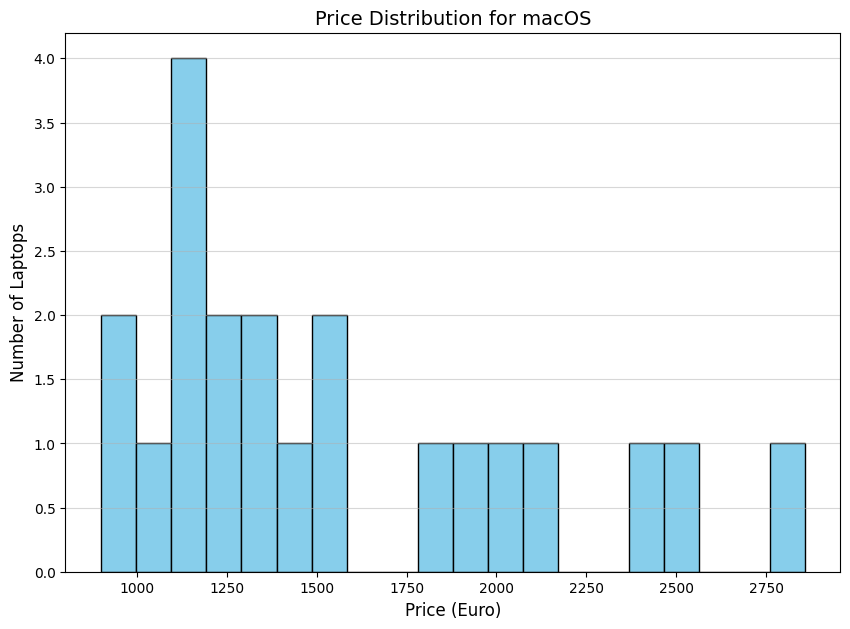

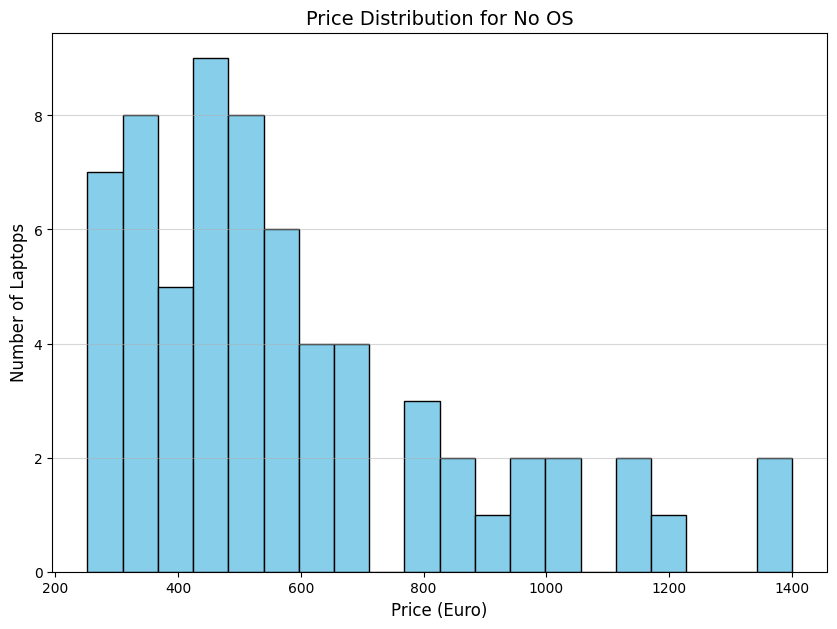

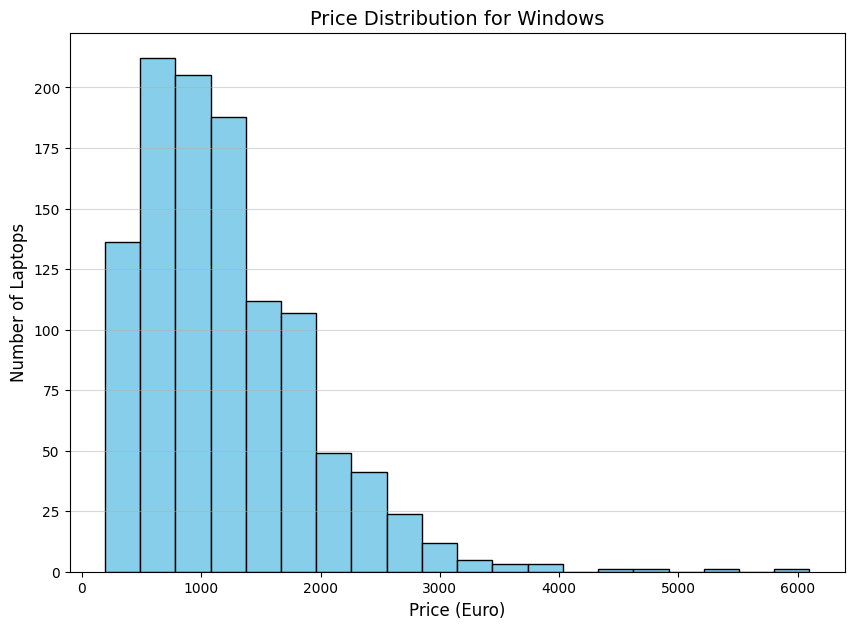

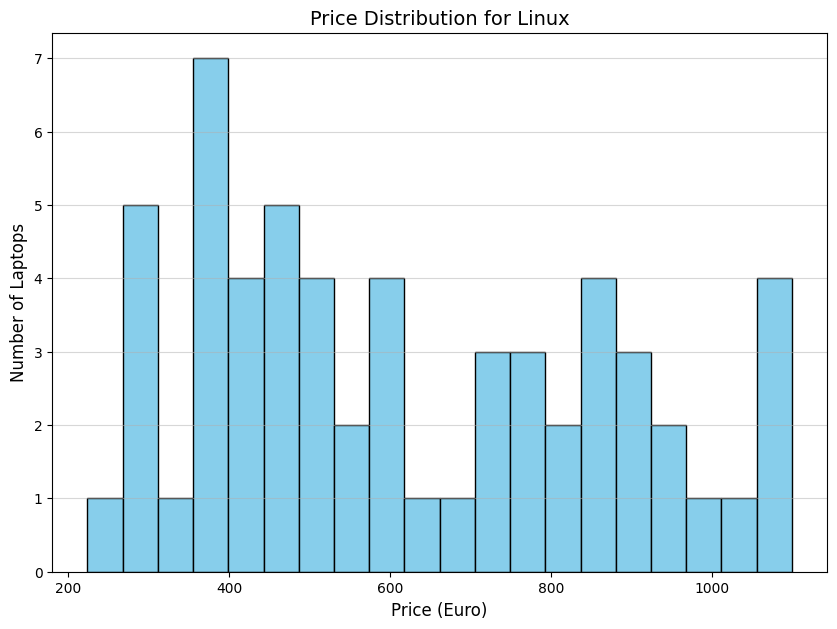

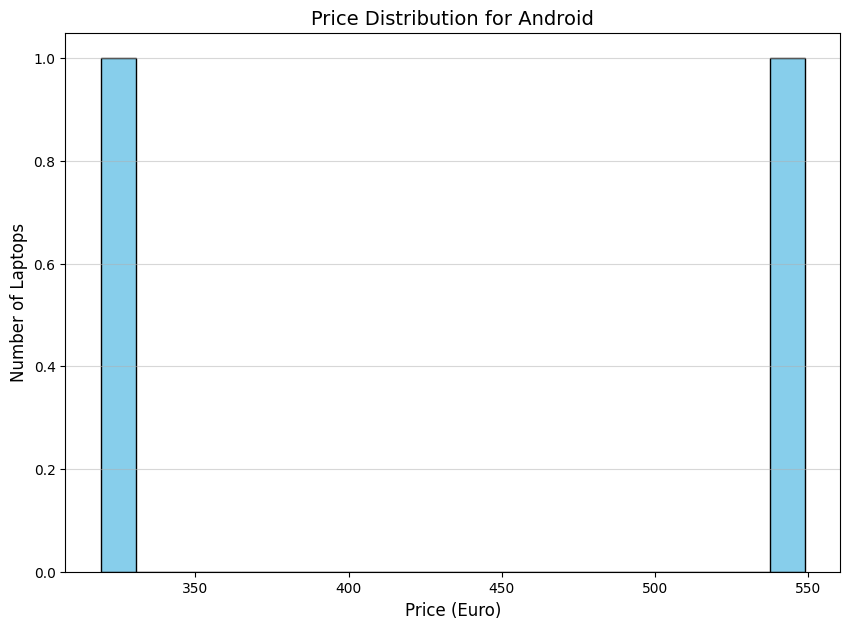

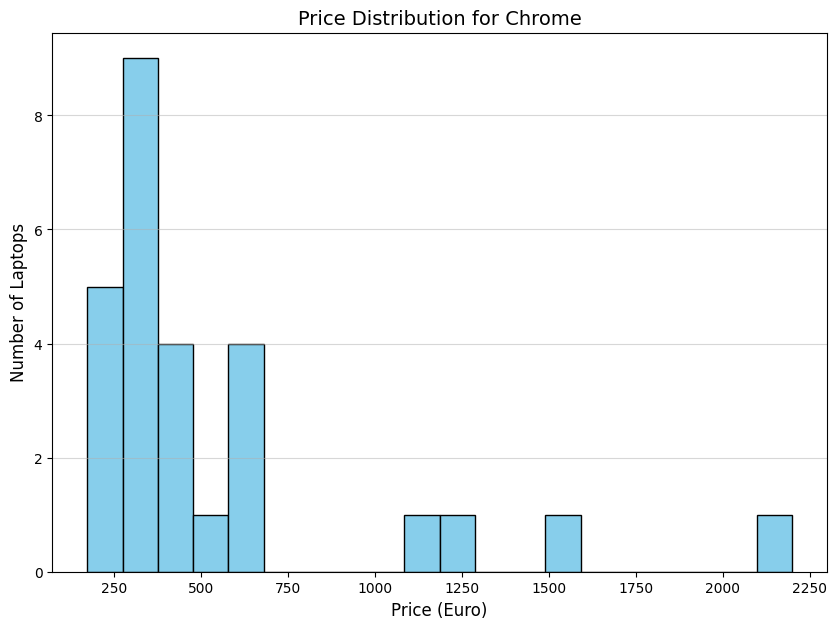

In [14]:
def categorife_os(os_name): #checking each name 
    if 'mac' in os_name or 'Mac' in os_name:
        return 'macOS'
    elif 'Windows' in os_name:
        return'Windows'
    elif 'Android' in os_name:
        return'Android'
    elif 'Chrome' in os_name:
        return'Chrome'
    elif 'Linox' in os_name:
        return'Linox'
    else:
        return os_name
external_data_frame['OpSys'] = external_data_frame['OpSys'].apply(categorife_os)
print(external_data_frame['OpSys'].unique())
print("-" * 55)

#creating the graphs
uniqeu_system = external_data_frame['OpSys'].unique()
for os_name in uniqeu_system:
    subset = external_data_frame[external_data_frame['OpSys'] == os_name]# creating table with the current company computers
    plt.figure(figsize=(10, 7))
    plt.hist(subset['Price (Euro)'], bins=20, color='skyblue', edgecolor='black')#
    plt.title(f'Price Distribution for {os_name}', fontsize=14)
    plt.xlabel('Price (Euro)', fontsize=12)
    plt.ylabel('Number of Laptops', fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.show()


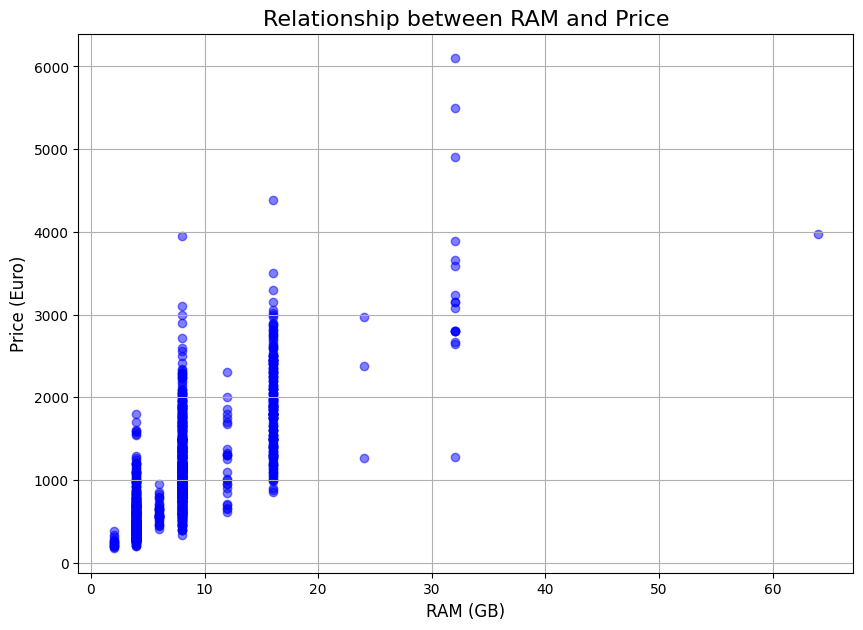

     Company             Product  RAM (GB)  Price (Euro)
17     Apple         MacBook Pro        16       2858.00
196    Razer           Blade Pro        32       6099.00
204     Dell      Precision 7520        16       3055.00
238     Asus   ROG G703VI-E5062T        32       3890.00
247     Asus  Rog G701VIK-BA060T        16       2999.00
297     Dell      Precision 7720        16       2884.86
517     Asus        ROG Zephyrus        24       2968.00
530     Dell        Alienware 17        16       3012.77
563   Lenovo        Thinkpad P71         8       2999.00
610   Lenovo        Thinkpad P51        32       4899.00
659     Dell        Alienware 17        32       3147.37
723     Dell        Alienware 17        32       3659.40
744   Lenovo       Thinkpad P51s        16       3299.00
749       HP            Zbook 17        16       4389.00
758     Dell        Alienware 17        16       2868.99
778    Razer           Blade Pro        16       2899.00
780     Dell        Alienware 1

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(external_data_frame['RAM (GB)'], external_data_frame['Price (Euro)'], alpha=0.5, color='blue')
plt.title('Relationship between RAM and Price', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True)
plt.show()

Q1 = external_data_frame['Price (Euro)'].quantile(0.25) #the first (25%)
Q3 = external_data_frame['Price (Euro)'].quantile(0.75) #the third (75%)
IQR = Q3 - Q1 #calculation of the inter quarter range 

#define the outliers 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = external_data_frame[(external_data_frame['Price (Euro)'] < lower_bound) | (external_data_frame['Price (Euro)'] > upper_bound)]
print(outliers[['Company', 'Product', 'RAM (GB)', 'Price (Euro)']])

In [17]:
def get_storage_type(memory_value):
    #firstly ill check the combination 
    if 'SSD' in memory_value and 'HDD' in memory_value:
        return 'SSD + HDD'
    elif 'SSD' in memory_value and 'Hybrid' in memory_value:
        return 'SSD + Hybrid'
    elif 'Flash Storage' in memory_value and 'HDD' in memory_value:
        return 'Flash Storage + HDD'
    
    # now ill check each case alone
    elif 'SSD' in memory_value:
        return 'SSD'
    elif 'HDD' in memory_value:
        return 'HDD'
    elif 'Flash Storage' in memory_value:
        return 'Flash Storage'
    elif 'Hybrid' in memory_value:
        return 'Hybrid'
    else:
        return 'Unknown' #if nothing are in it ill return unknown not suppose to happen

# 
external_data_frame['Storage type'] = external_data_frame['Memory'].apply(get_storage_type)

# checking the result 
print(external_data_frame[['Memory', 'Storage type']])
print("\nUnique Storage Types extracted:")
print(external_data_frame['Storage type'].unique())

                   Memory   Storage type
0               128GB SSD            SSD
1     128GB Flash Storage  Flash Storage
2               256GB SSD            SSD
3               512GB SSD            SSD
4               256GB SSD            SSD
...                   ...            ...
1270            128GB SSD            SSD
1271            512GB SSD            SSD
1272   64GB Flash Storage  Flash Storage
1273              1TB HDD            HDD
1274            500GB HDD            HDD

[1275 rows x 2 columns]

Unique Storage Types extracted:
['SSD' 'Flash Storage' 'HDD' 'SSD + HDD' 'Hybrid' 'Flash Storage + HDD'
 'SSD + Hybrid']
